# **BLACK FRIDAY SALES DATA- EDA**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [86]:
import os

# Create the folder if it doesn't exist
if not os.path.exists("images"):
    os.makedirs("images")


**LOADING AND UNDERSTANDING THE DATA**

In [3]:
df=pd.read_csv('/content/BlackFriday.csv')
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [4]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
df.shape

(537577, 12)

**DATA CLEANING**


In [6]:
## FINDING THE NO OF NULL VALUES IN THE DATASET
df.isna().sum()


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [7]:
## DEALING WITH NULL VALUES
del df['Product_Category_2']   ## Dropping all the rows would drastically shrink the dataset and there will be huge data loss.
del df['Product_Category_3']   ## Dropping these 2 columns seems more feasible as they majorly contain null values.

In [8]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  Purchase  
0                          2               0                   3      8370  
1                          2               0                   1     15200  
2                          2               0                  12      1422  
3                          2               0                  12      1057  
4                         4+               0                   8      7969

**DATA OVERVIEW**

In [9]:
df.shape

(537577, 10)

In [10]:
df.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Purchase                      17959
dtype: int64

In [11]:
df.dtypes   ## THE DATATYPES OF ALL THE COLUMNS

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Purchase                       int64
dtype: object

In [12]:
print('There are',df['User_ID'].nunique(),'no of distinct users')

There are 5891 no of distinct users


In [13]:
print('There are',df['Product_ID'].nunique(),'no of distinct products')

There are 3623 no of distinct products


In [14]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

# **UNIVARIATE ANALYSIS**

In [15]:
## ANALYZING DIFFERENT COLUMNS
for column in df.columns:
  print(column,':',df[column].nunique())


User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


### 1)THE GENDER COLUMN ANALYSIS

In [16]:
## COUNTING THE NO OF MALES AND FEMALES
df['Gender']
df_1=df[df['Gender']=='M']
df_2=df[df['Gender']=='F']
print('There are ',len(df_1),'no of males');
print('There are ',len(df_2),'no of females');

There are  405380 no of males
There are  132197 no of females


In [17]:
data=pd.DataFrame({'Ratio':[len(df[df['Gender']=='M']),len(df[df['Gender']=='F'])]},index=['Male','Female'])
data

Ratio
Male    405380
Female  132197

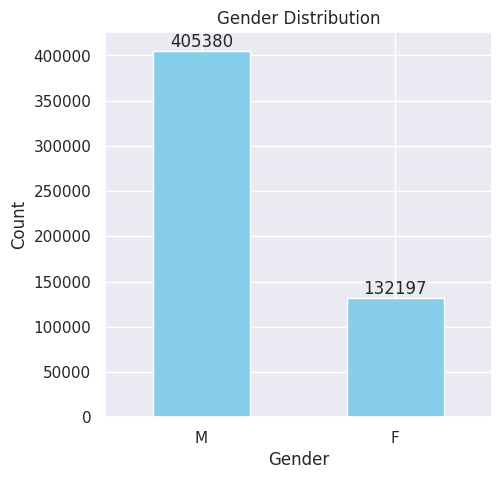

In [88]:
# BAR PLOT TO VISUALIZE THE GENDER RATIO
plt.figure(figsize=(5,5))

gender_counts = df['Gender'].value_counts()
ax = gender_counts.plot(kind='bar', color='skyblue')
for i, value in enumerate(gender_counts):
    plt.text(i, value + 10, str(value), ha='center', va='bottom')

plt.title("Gender Distribution")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.savefig('images/gender_distribution.png')
plt.show()


The no of males in the dataset is significantly higher as compared to the no of females.

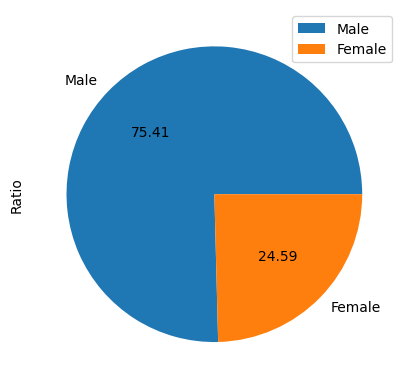

In [19]:
## PIE CHART FOR VISUALIZATION USING PANDAS
data.plot(kind='pie',y='Ratio',autopct='%.2f')
plt.show()

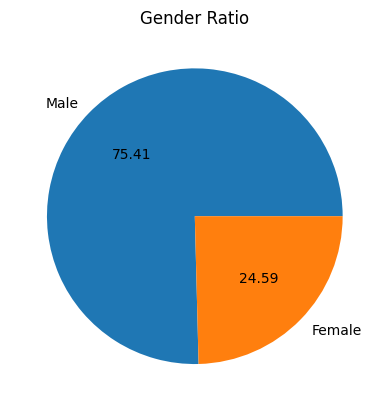

In [20]:
## USING MATPLOTLIB FOR PIE CHART VISUALIZATION
plt.pie(x=data['Ratio'], labels=data.index, autopct='%.2f')
plt.title('Gender Ratio')
plt.show()

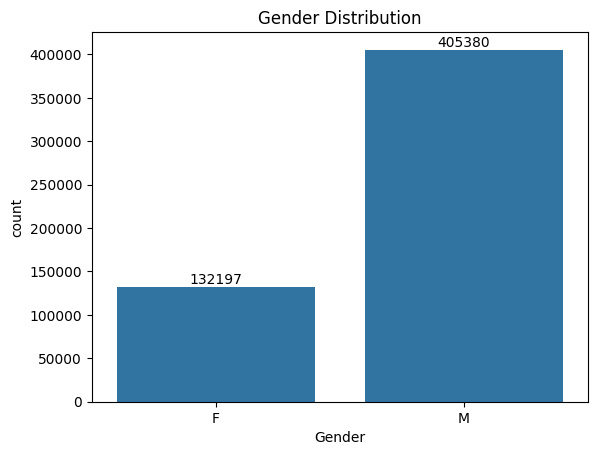

In [21]:
ax=sns.countplot(x='Gender',data=df)
for container in ax.containers:
    ax.bar_label(container)

plt.title("Gender Distribution")
plt.show()

In [22]:
df.groupby('Gender').size()

Gender
F    132197
M    405380
dtype: int64

### ANALYZING THE PURCHASE COLUMN

In [23]:

df['Purchase'].astype(float)
print(df['Purchase'].dtype)



int64


In [24]:
if df['Purchase'].dtype == 'object':
    # If it's an object type, assume it contains strings and try the replacement
    df['Purchase'] = df['Purchase'].str.replace(',', '').astype(float)
elif df['Purchase'].dtype in ['int64', 'float64']:
    # If it's already numeric, no need for str.replace
    print("Purchase column is already numeric. Skipping string replacement.")
else:
    # Handle other data types if necessary
    print(f"Purchase column has unexpected dtype: {df['Purchase'].dtype}")
    # You might need to investigate the column content further

# After successful conversion (or if it was already numeric), you can proceed
print(df['Purchase'].dtype)


Purchase column is already numeric. Skipping string replacement.
int64


In [25]:
df['Purchase'] = pd.to_numeric(df['Purchase'], errors='coerce')


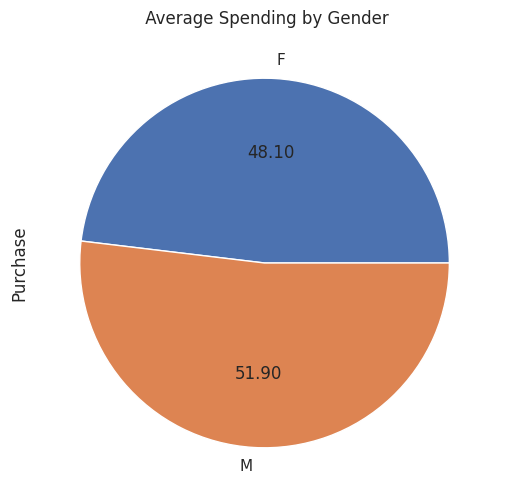

In [90]:
## AVERAGE SPENDING BY GENDER
df.groupby('Gender')['Purchase'].mean().plot(kind='pie',autopct='%.2f')
plt.title(' Average Spending by Gender')
plt.savefig('images/Average_Spending_Gender.png')
plt.show()

In [75]:
## PURCHASING TREND BETWEEN MEN AND WOMEN
x=df.shape[0]
females_percent=(len(df[df['Gender']=='F'])/x)*100
print('The percent of females in the dataset are:',females_percent,'%')
males_percent=(len(df[df['Gender']=='M'])/x)*100
print('The percent of males in the dataset are:',males_percent,'%')
amt=df['Purchase'].sum()
amt_females=df[df['Gender']=='F']['Purchase'].sum()
amt_males=df[df['Gender']=='M']['Purchase'].sum()
print('The total amount spent by females are:',amt_females)
print('The total amount spent by males are:',amt_males)
f=amt_females/amt
m=amt_males/amt
print('The percent of total amt spent on purchases by females are:',f*100,'%')
print('The percent of total amt spent on purchases by males are:',m*100,'%')





The percent of females in the dataset are: 24.59126785558162 %
The percent of males in the dataset are: 75.40873214441838 %
The total amount spent by females are: 1164624021
The total amount spent by males are: 3853044357
The percent of total amt spent on purchases by females are: 23.21046217614344 %
The percent of total amt spent on purchases by males are: 76.78953782385656 %


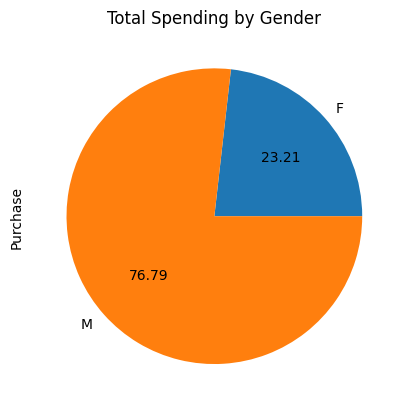

In [27]:
## TOTAL SPENDING BY GENDER
df.groupby('Gender')['Purchase'].sum().plot(kind='pie',autopct='%.2f')
plt.title('Total Spending by Gender')
plt.show()

### Males are spending much more as compared to females.

**ANALYZING THE AGE VARIABLE**

In [28]:
## ANALYZING THE AGE VARIABLE
df.groupby('Age').size()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
dtype: int64

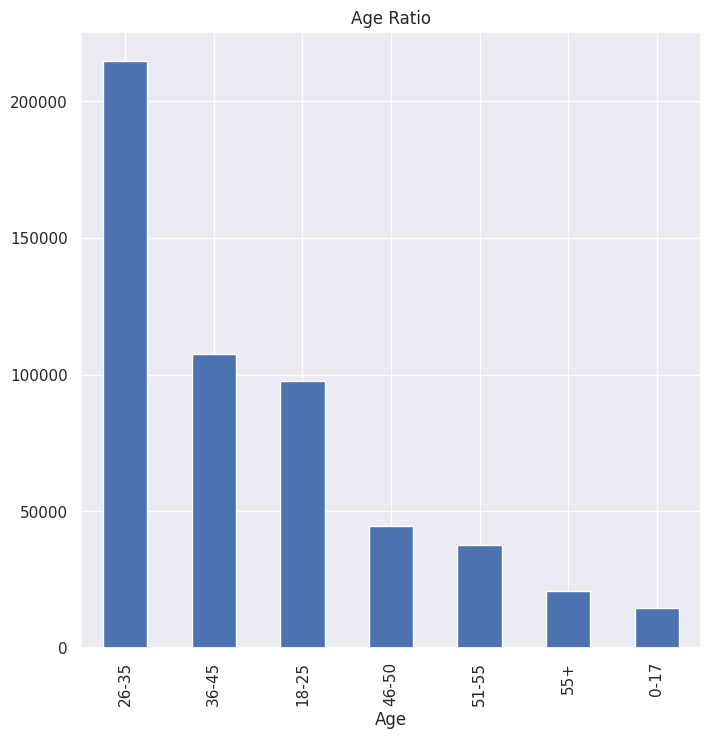

In [91]:
## THE AGE RATIO
plt.figure(figsize=(8,8))
df.groupby('Age').size().sort_values(ascending=False).plot(kind='bar',title='Age Ratio')
plt.savefig('images/Age_Ratio.png')
plt.show()

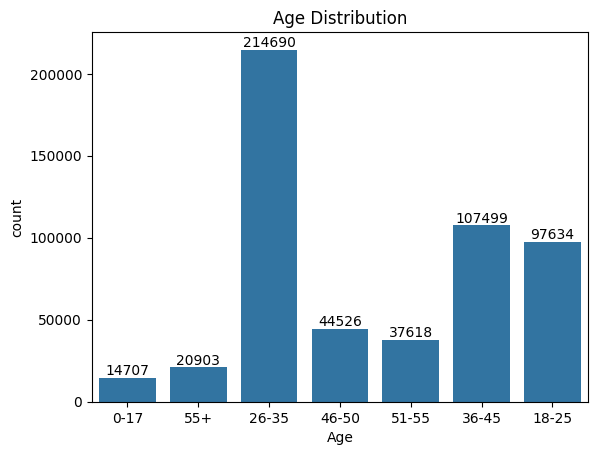

In [30]:
ax=sns.countplot(x='Age',data=df)
for container in ax.containers:
    ax.bar_label(container)

plt.title("Age Distribution")
plt.show()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     537577 non-null  int64 
 1   Product_ID                  537577 non-null  object
 2   Gender                      537577 non-null  object
 3   Age                         537577 non-null  object
 4   Occupation                  537577 non-null  int64 
 5   City_Category               537577 non-null  object
 6   Stay_In_Current_City_Years  537577 non-null  object
 7   Marital_Status              537577 non-null  int64 
 8   Product_Category_1          537577 non-null  int64 
 9   Purchase                    537577 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 41.0+ MB


In [32]:
## NO OF PRODUCTS BOUGHT BY EACH AGE GROUP
lst=[]
for i in df['Age'].unique():
  lst.append([i,df[df['Age']==i]['Product_ID'].nunique()])
print(lst)
df_1=pd.DataFrame(lst,columns=['Age','Products'])


[['0-17', 2300], ['55+', 2573], ['26-35', 3419], ['46-50', 3099], ['51-55', 2877], ['36-45', 3318], ['18-25', 3213]]


In [33]:
df_1.sort_values(by='Products',ascending=False,inplace=True)

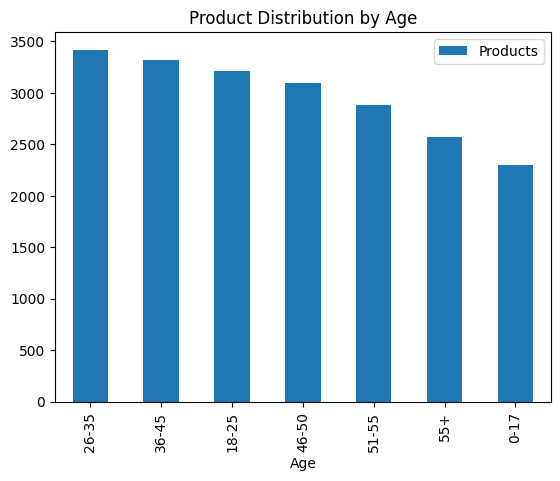

In [34]:
df_1.plot(kind='bar',x='Age',y='Products',title='Product Distribution by Age')

plt.show()

Through the above graph we can infer that majourity of the customers lie in the age group of 26-35. The  customers in the age group 26-35 form the most significant subgroup.


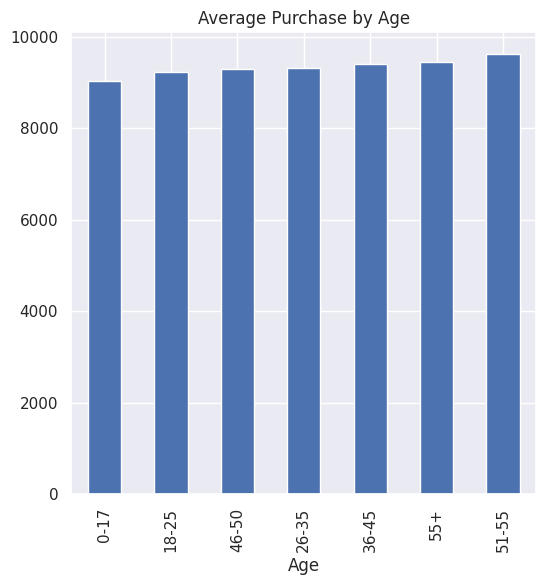

In [92]:
## AVERAGE PURCHASE BY DIFFERENT AGE GROUPS
df.groupby('Age')['Purchase'].mean().sort_values(ascending=True).plot(kind='bar',title='Average Purchase by Age')
plt.savefig('images/Avg_Purchase_Age.png')
plt.show()

People in the age group 26-35 have the highest purchasing power and are spending quite a lot.
The future products should be designed keeping in mind their preferences and choices.

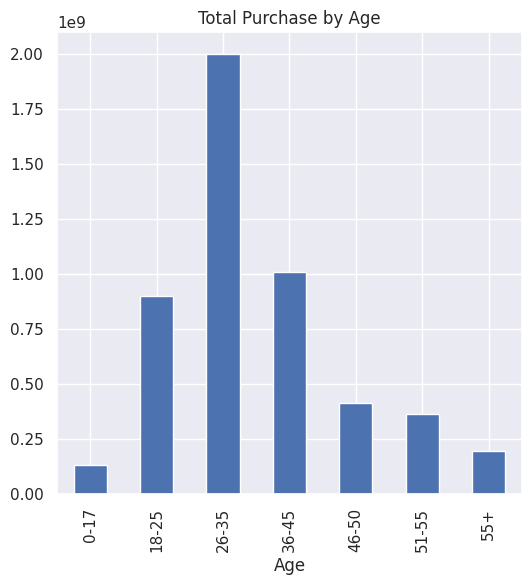

In [93]:
## TOTAL PURCHASE BY AGE
x=df.groupby('Age')['Purchase'].sum().plot(kind='bar',title='Total Purchase by Age')
plt.savefig('images/Total_Purchase_Age.png')
plt.show()

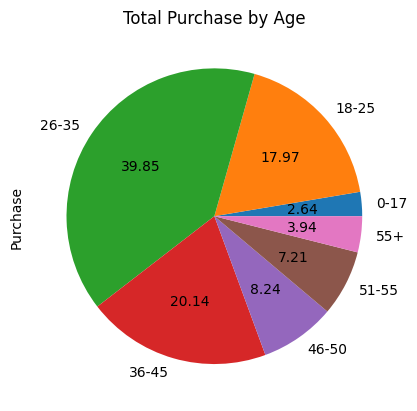

In [37]:
df.groupby('Age')['Purchase'].sum().plot(kind='pie',autopct='%.2f',title='Total Purchase by Age')
plt.show()

**MARITAL STATUS ANALYSIS**

In [38]:
## ANALZING THE MARITAL STATUS
df.groupby('Marital_Status').size()

Marital_Status
0    317817
1    219760
dtype: int64

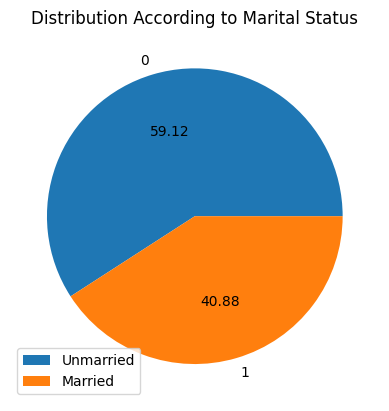

In [39]:
df.groupby('Marital_Status').size().plot(kind='pie', autopct='%.2f',subplots=True)
plt.legend(['Unmarried','Married'])
plt.title('Distribution According to Marital Status')
plt.show()

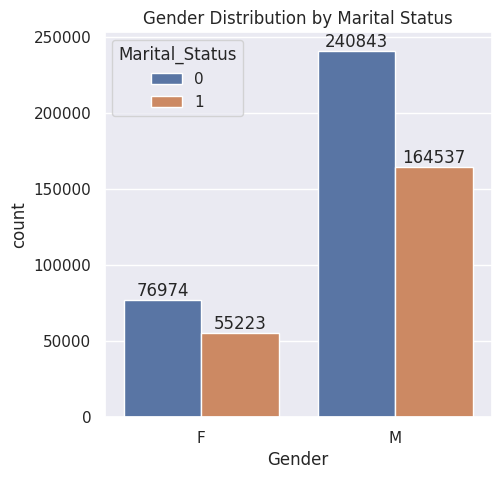

In [94]:
## GENDER DISTRIBUTION BY MARITAL STATUS
plt.figure(figsize=(5,5))
ax=sns.countplot(x='Gender',hue='Marital_Status',data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Gender Distribution by Marital Status')
plt.savefig('images/Gender_Maritalstatus.png')
plt.show()

In [41]:
## WHO IS SPENDING MORE - MARRIED OR UNMARRIED SEGMENTS
df.groupby('Marital_Status')['Purchase'].mean()


Marital_Status
0    9333.325467
1    9334.632681
Name: Purchase, dtype: float64

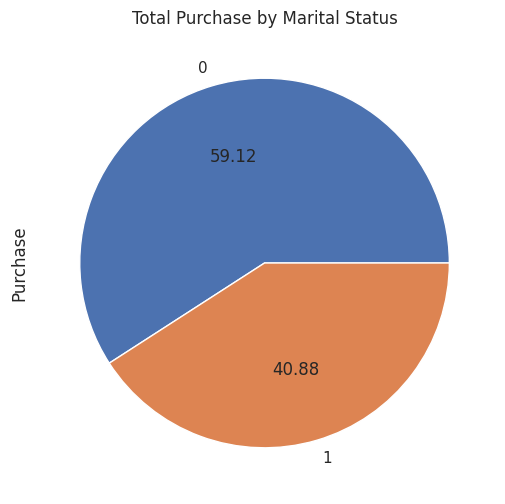

In [78]:
df.groupby('Marital_Status')['Purchase'].sum().plot(kind='pie',autopct='%.2f',title='Total Purchase by Marital Status')
plt.show()

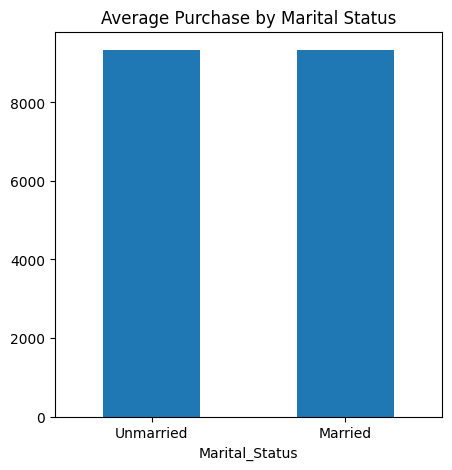

In [42]:
plt.figure(figsize=(5,5))
df.groupby('Marital_Status')['Purchase'].mean().plot(kind='bar',title='Average Purchase by Marital Status')
plt.xticks([0.0,1.0],['Unmarried','Married'])
plt.xticks(rotation=0)
plt.show()

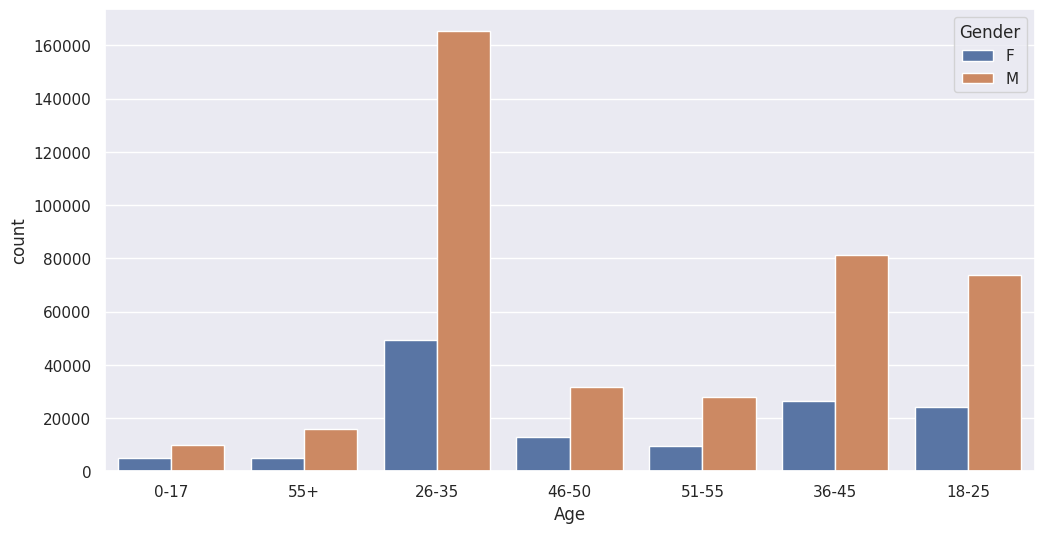

In [43]:
## GENDER AND AGE
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = "Age", hue = 'Gender', data = df)
plt.show()

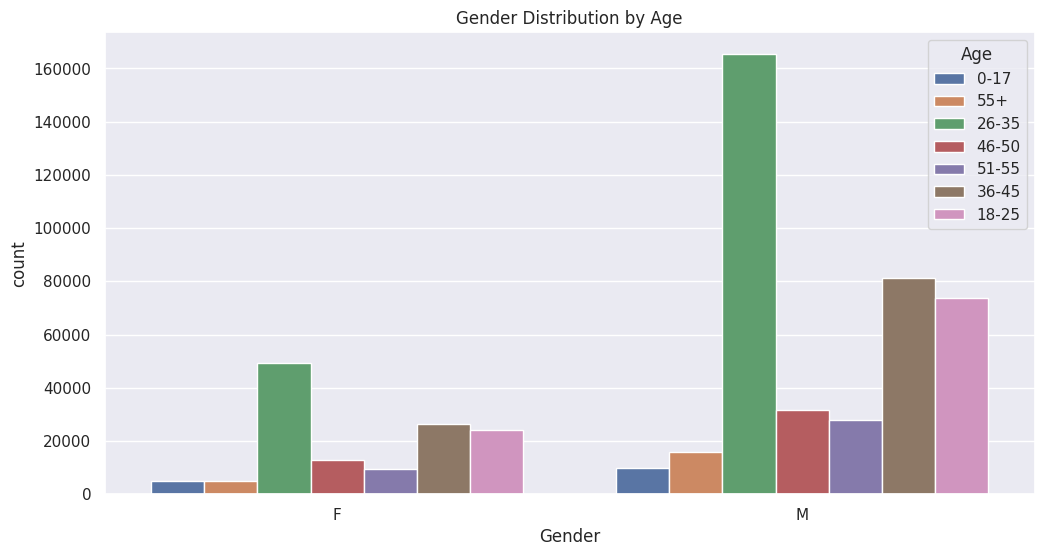

In [95]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = "Gender", hue = 'Age', data = df)
plt.title('Gender Distribution by Age')
plt.savefig('images/GenderDistribution_Age.png')
plt.show()

**ANALYZING THE CITY CATEGORY COLUMN**

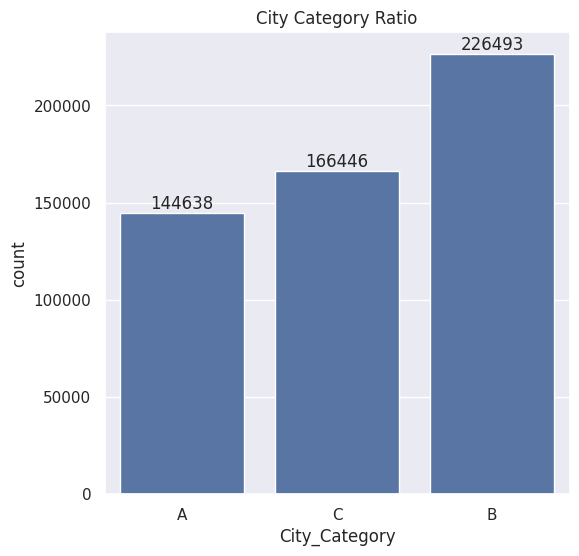

In [96]:
## CITY CATEGORY RATIO
sns.set(rc = {'figure.figsize' : (6,6)})
ax=sns.countplot(x=df['City_Category'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('City Category Ratio')
plt.savefig('images/CityCategory_Ratio.png')
plt.show()

Most no of customers are from City B

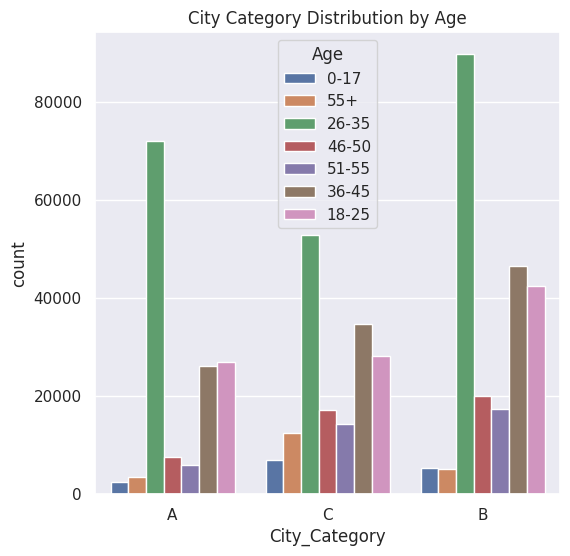

In [97]:
# CITY CATEGORY DISTRIBUTION BY AGE
sns.countplot(x = 'City_Category', hue = 'Age', data = df)
plt.title('City Category Distribution by Age')
plt.savefig('images/Citycategory_Age.png')
plt.show()

In all cities maximum no of the customers are in the age group 26-35

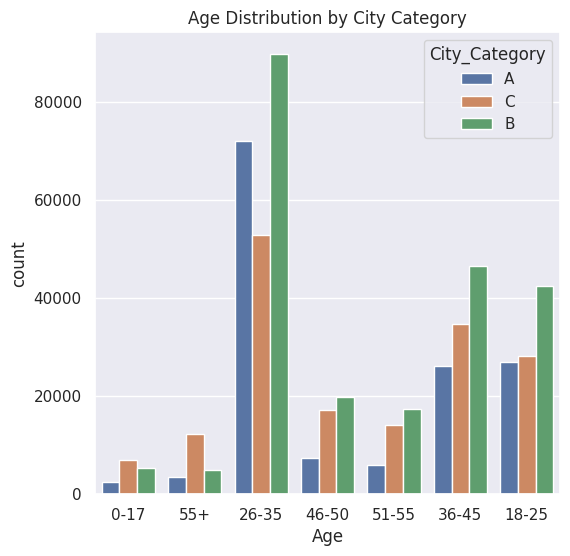

In [47]:

sns.set(rc = {'figure.figsize' : (6,6)})
ax=sns.countplot(x = 'Age', hue = 'City_Category', data = df)
plt.title('Age Distribution by City Category')
plt.show()

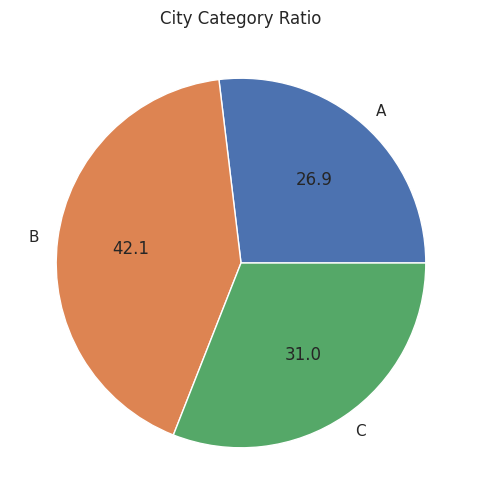

In [48]:
## CITY CATEGORY DISTRIBUTION
df.groupby('City_Category').size().plot(kind = 'pie', autopct = '%0.1f',figsize=(6,6))
plt.title('City Category Ratio')
plt.show()

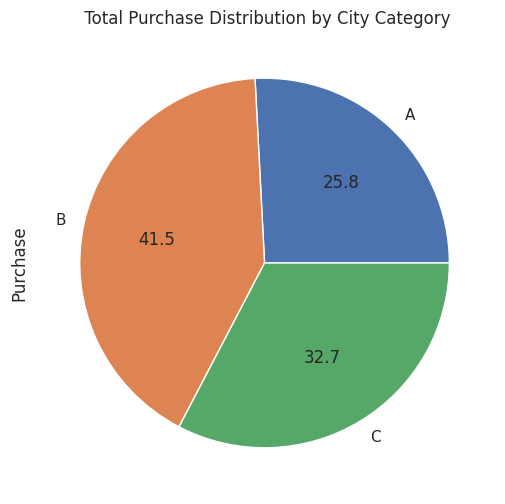

In [98]:
## TOTAL PURCHASE DISTRIBUTION BY CITY CATEGORY
df.groupby('City_Category')['Purchase'].sum().plot(kind = 'pie', autopct = "%0.1f", title=' Total Purchase Distribution by City Category')
plt.savefig('images/TotalPurchase_City.png')
plt.show()

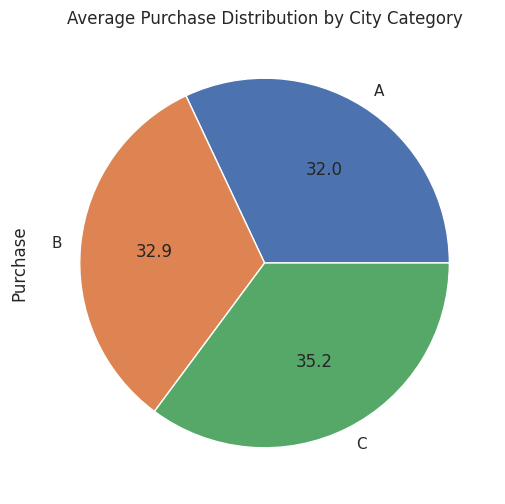

In [50]:
## AVERAGE PURCHASE DISTRIBUTION BY CITY CATEGORY
df.groupby('City_Category')['Purchase'].mean().plot(kind = 'pie', autopct = "%0.1f", title='Average Purchase Distribution by City Category')
plt.show()

The average amt spent is highest in City C probably because the customers of city are buying costlier products and spending more.

In [51]:
## ANALYZING GENDER AND MARITAL STATUS
l=[]
for i in range(len(df)):
  l.append(df['Gender'][i]+'_'+str(df['Marital_Status'][i]))
print(l)

['F_0', 'F_0', 'F_0', 'F_0', 'M_0', 'M_0', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'F_0', 'F_0', 'F_0', 'F_0', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_0', 'M_0', 'M_0', 'M_0', 'F_1', 'F_1', 'F_1', 'F_1', 'F_1', 'F_1', 'F_1', 'F_1', 'F_1', 'F_1', 'F_1', 'F_1', 'F_1', 'F_1', 'F_1', 'F_1', 'F_1', 'F_1', 'F_0', 'F_0', 'F_0', 'M_0', 'M_0', 'M_1', 'M_1', 'M_1', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'F_1', 'F_1', 'M_0', 'M_0', 'M_0', 'F_0', 'F_0', 'F_0', 'F_0', 'F_0', 'F_0', 'F_0', 'F_0', 'F_0', 'F_0', 'F_0', 'F_0', 'F_0', 'F_0', 'F_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'F_1', 'F_1', 'F_1', 'M_0', 'M_0', 'M_0', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1'

In [52]:
df['Marital_Gender']=l

In [53]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  Purchase  \
0                          2               0                   3      8370   
1                          2               0                   1     15200   
2                          2               0                  12      1422   
3                          2               0                  12      1057   
4                         4+               0                   8      7969   

  Marital_Gender  
0            F_0  
1            F_0  
2            F_0  
3            F_0  
4            M_0

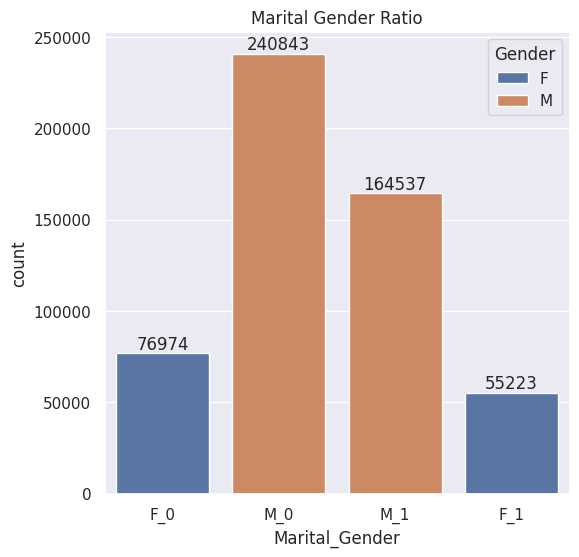

In [54]:
## MARITAL GENDER RATIO
ax=sns.countplot(x='Marital_Gender',hue='Gender',data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Marital Gender Ratio')
plt.show()

Unmarried males form the largest section of the customers.

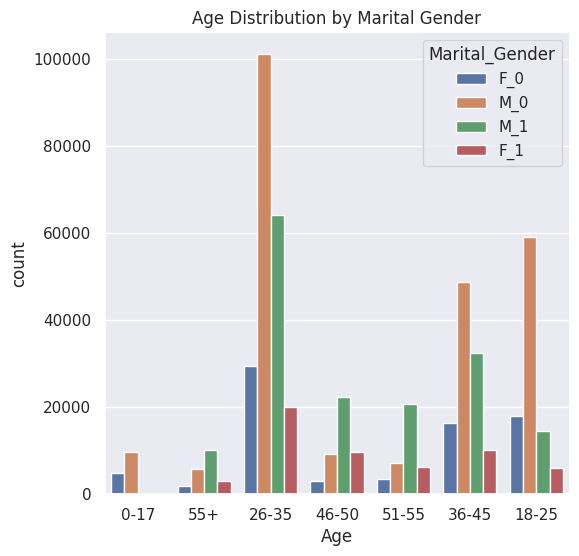

In [55]:
## 'Age Distribution by Marital Gender
sns.countplot(x='Age',hue='Marital_Gender',data=df)
plt.title('Age Distribution by Marital Gender')
plt.show()

**ANALYZING THE PRODUCT CATEGORY AND OCCUPATION**

In [56]:
df['Product_Category_1']

0          3
1          1
2         12
3         12
4          8
          ..
537572     1
537573     1
537574     8
537575     5
537576     5
Name: Product_Category_1, Length: 537577, dtype: int64

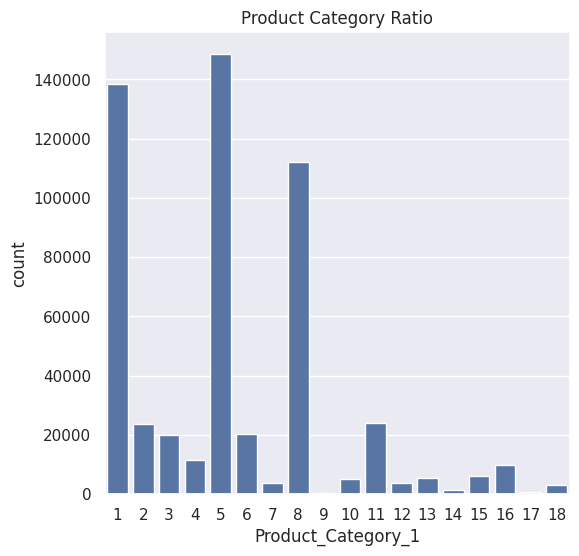

In [57]:
ax=sns.countplot(x = df['Product_Category_1'])
plt.title('Product Category Ratio')
plt.show()

<Axes: xlabel='City_Category', ylabel='count'>

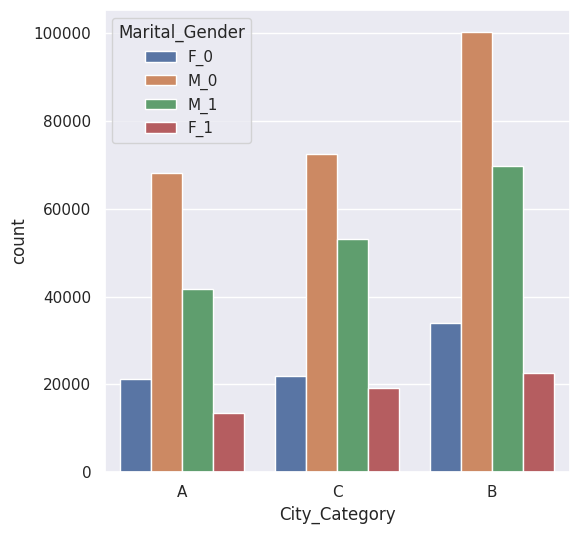

In [58]:
sns.countplot(x = df['City_Category'], hue = df['Marital_Gender'])

In [59]:
df['Occupation'].nunique()


21

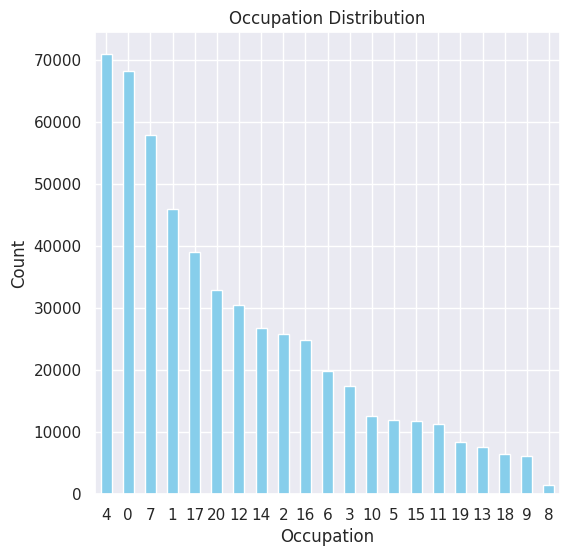

In [60]:
# OCCUPATION AND PRODUCT ANALYSIS
Occupation_Ratio=df['Occupation'].value_counts()
ax = Occupation_Ratio.plot(kind='bar', color='skyblue')
plt.title('Occupation Distribution')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

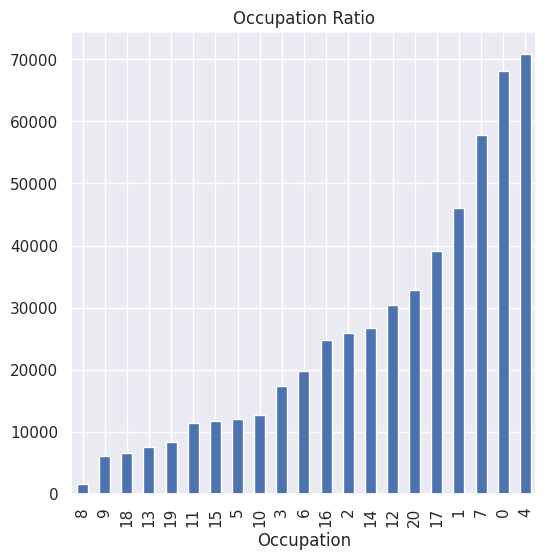

In [61]:
df.groupby('Occupation').size().sort_values().plot(kind='bar',title='Occupation Ratio')
plt.show()

<Axes: title={'center': 'Average Purchase by Occupation'}, xlabel='Occupation'>

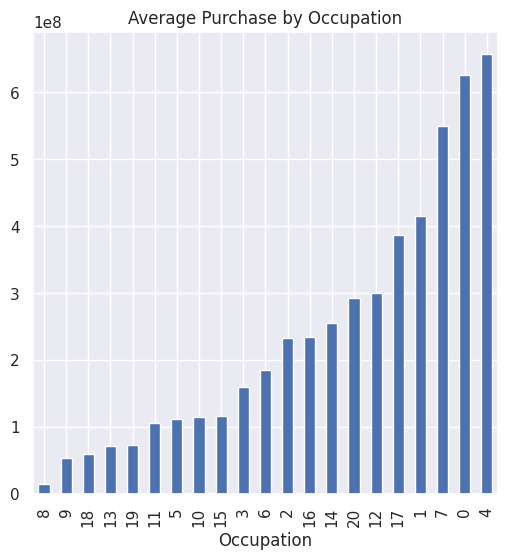

In [62]:
df.groupby('Occupation')['Purchase'].sum().sort_values().plot(kind='bar',title='Average Purchase by Occupation')

<Axes: xlabel='Occupation', ylabel='count'>

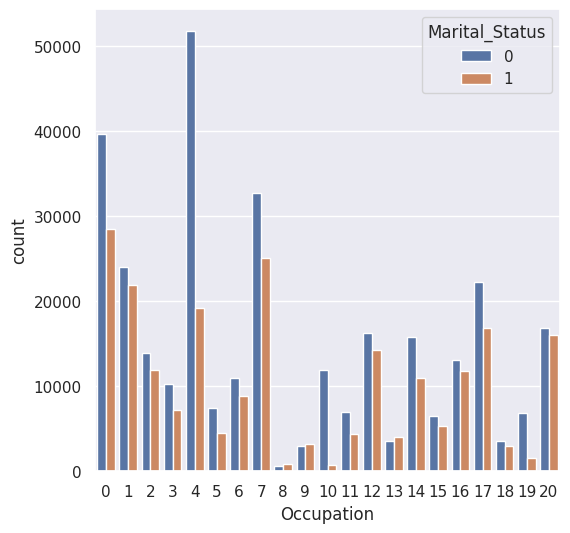

In [63]:
sns.countplot(x = 'Occupation', hue = 'Marital_Status', data = df)

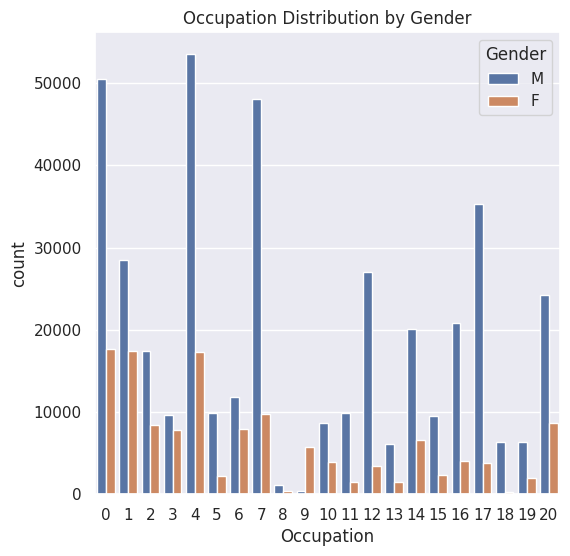

In [81]:
sns.countplot(x = 'Occupation', hue = 'Gender', data = df)
plt.title('Occupation Distribution by Gender')
plt.show()

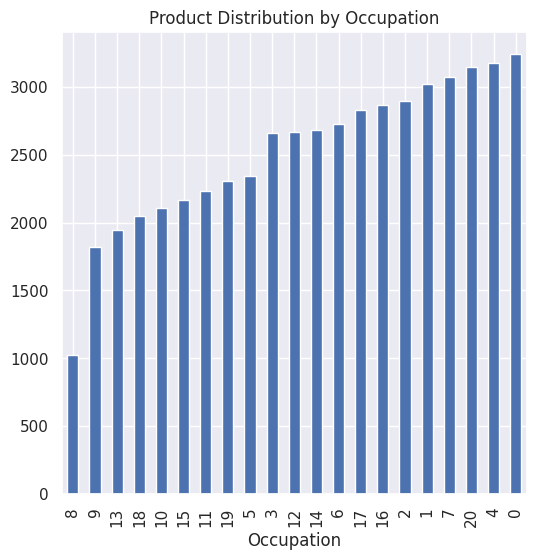

In [80]:
df.groupby('Occupation')['Product_ID'].nunique().sort_values().plot(kind='bar',title='Product Distribution by Occupation')
plt.show()

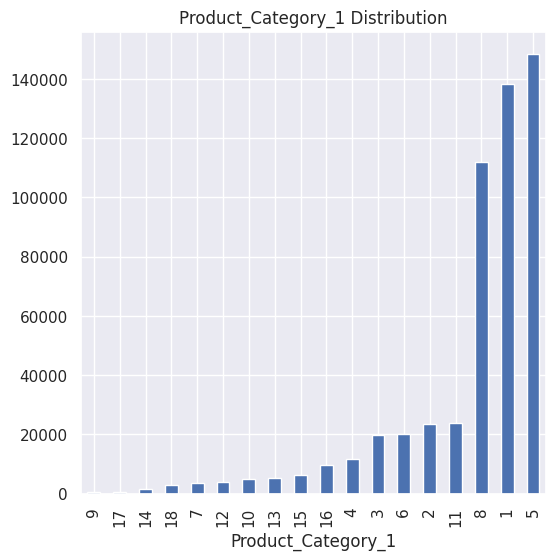

In [79]:
df.groupby('Product_Category_1').size().sort_values().plot(kind = 'bar')
plt.title('Product_Category_1 Distribution')
plt.show()

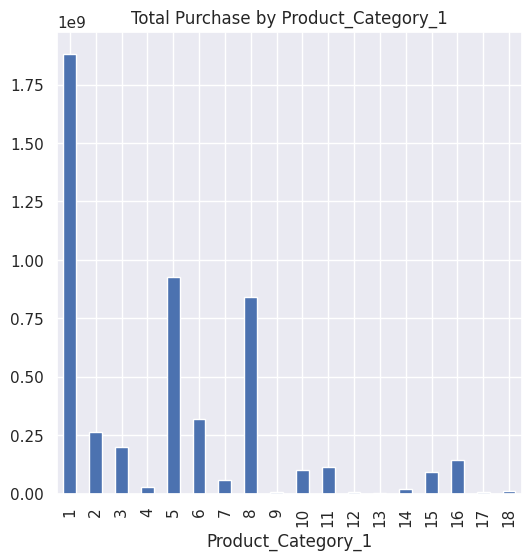

In [82]:
df.groupby('Product_Category_1')['Purchase'].sum().plot(kind = 'bar')
plt.title('Total Purchase by Product_Category_1')
plt.show()

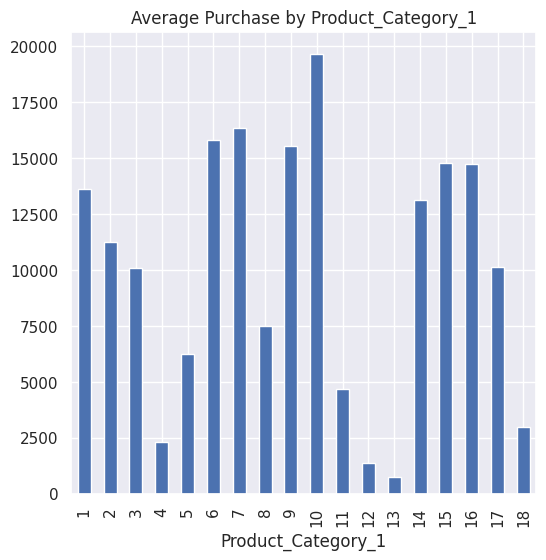

In [83]:
df.groupby('Product_Category_1')['Purchase'].mean().plot(kind = 'bar')
plt.title('Average Purchase by Product_Category_1')
plt.show()

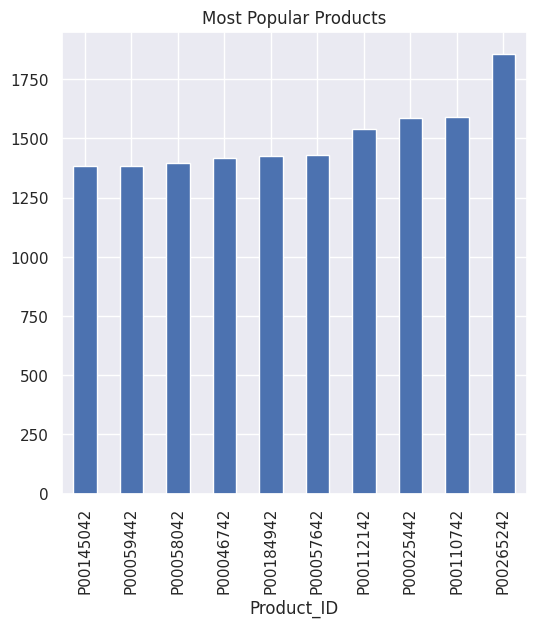

In [84]:
df.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind = 'bar')
plt.title('Most Popular Products')
plt.show()

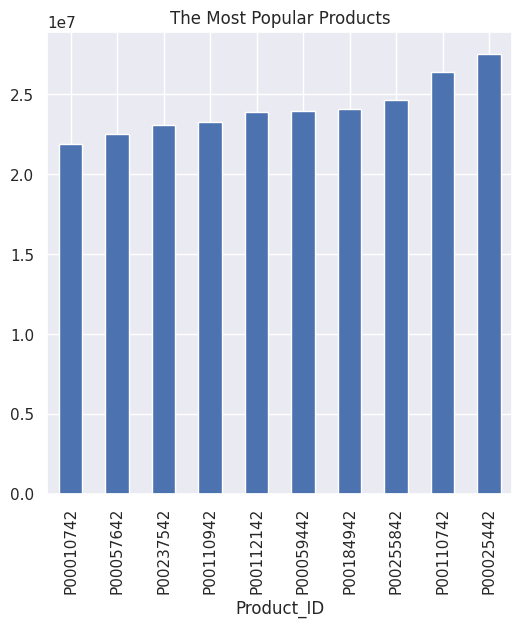

In [70]:
df.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values().plot(kind = 'bar',title='The Most Popular Products by Amount Spent')
plt.show()

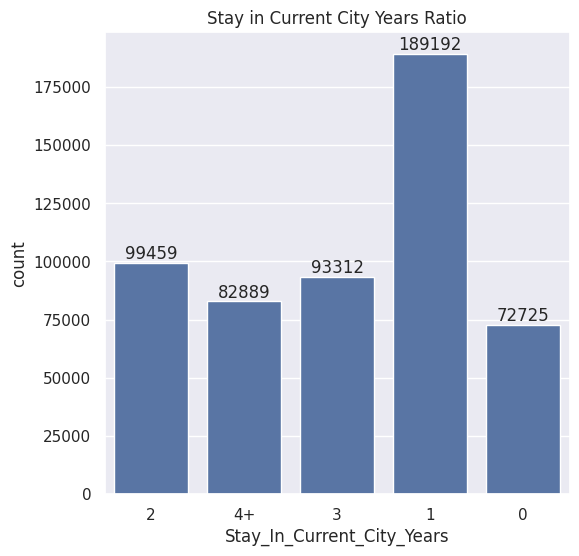

In [85]:
## Stay_In_Current_City_Years Analysis
ax=sns.countplot(x = df['Stay_In_Current_City_Years'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Stay in Current City Years Ratio')
plt.show()